In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("bikeDetails.csv")

# Introduction

In [4]:
data.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.1+ KB


In [188]:
data.describe()

,selling_price,year,km_driven,ex_showroom_price
count,1061.000000,1061.000000,1061.000000,6.260000e+02
mean,59638.151744,2013.867107,34359.833176,8.795871e+04
std,56304.291973,4.301191,51623.152702,7.749659e+04
min,5000.000000,1988.000000,350.000000,3.049000e+04
25%,28000.000000,2011.000000,13500.000000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,70000.000000,2017.000000,43000.000000,8.703150e+04
max,760000.000000,2020.000000,880000.000000,1.278000e+06


# EDA 

In [6]:
data[["seller_type","owner"]] = data[["seller_type","owner"]].apply(lambda x: x.astype("category"))

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   name               1061 non-null   object  
 1   selling_price      1061 non-null   int64   
 2   year               1061 non-null   int64   
 3   seller_type        1061 non-null   category
 4   owner              1061 non-null   category
 5   km_driven          1061 non-null   int64   
 6   ex_showroom_price  626 non-null    float64 
dtypes: category(2), float64(1), int64(3), object(1)
memory usage: 43.9+ KB


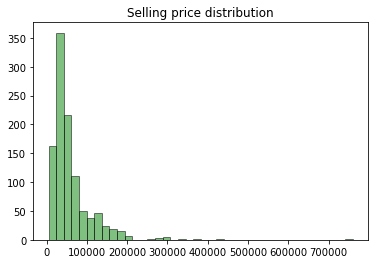

In [178]:
plt.hist(data['selling_price'], bins = 40, ec="black", color = "green", alpha = 0.5)
plt.title ("Selling price distribution")
plt.show()
plt.close()

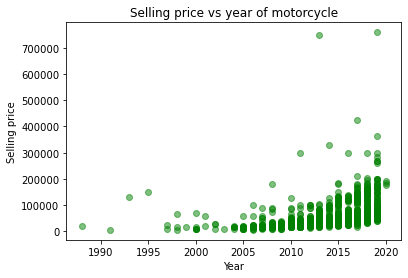

In [180]:
plt.scatter(data.year, data.selling_price, color = "green", alpha = 0.5)
plt.xlabel("Year")
plt.ylabel("Selling price")
plt.title ("Selling price vs year of motorcycle")
plt.show()
plt.close()

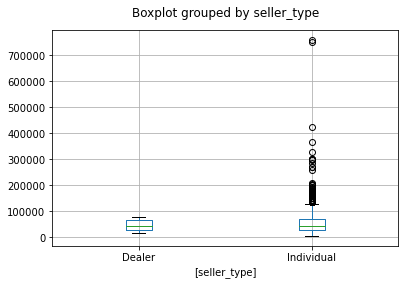

In [185]:
data.boxplot(column = ["selling_price"], by = ["seller_type"])
plt.title("")
plt.show()
plt.close()

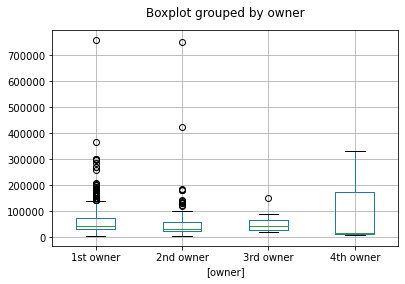

In [184]:
data.boxplot(column = ["selling_price"], by = ["owner"])
plt.title("")
plt.show()
plt.close()

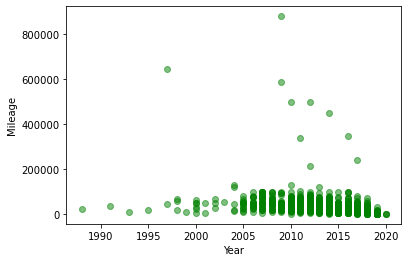

In [186]:
plt.scatter(data.year, data.km_driven, color = "green", alpha = 0.5)
plt.xlabel("Year")
plt.ylabel("Mileage")
plt.show()
plt.close()

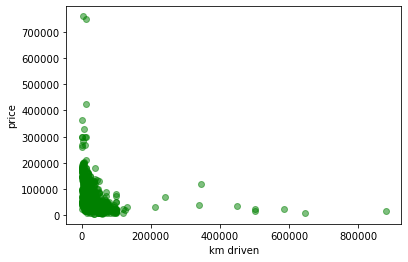

In [187]:
plt.scatter(data.km_driven, data.selling_price, color = "green", alpha = 0.5)
plt.xlabel("km driven")
plt.ylabel("price")
plt.show()
plt.close()

In [12]:
two_way_cross_tab = pd.crosstab (data.owner, data.seller_type)
two_way_cross_tab

seller_type,Dealer,Individual
owner,,
1st owner,4,920
2nd owner,2,121
3rd owner,0,11
4th owner,0,3


<AxesSubplot:xlabel='owner'>

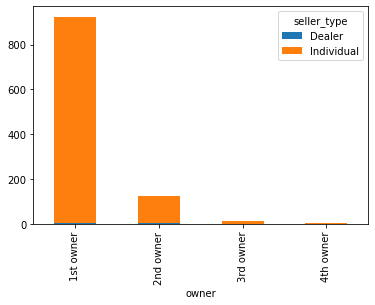

In [13]:
two_way_cross_tab.plot.bar(stacked = True)

## Grid Search Algorithm

**Just** *y*

In [192]:
import math

def loss_func(y, c):
    return (y-c)**2


def rmse(dy, c):
    result = {}
    for i in range(len (c)):
        sum_y = 0
        for j in range(dy.shape[0]):
            sum_y = sum_y + (loss_func(dy[j], c[i]))
        value = math.sqrt( 1/(dy.shape[0])*sum_y )   
        result.update({c[i]: value})
    return result

def create_grid_for_c(dy):
    result = []
    result.append (dy.median())
    result.append (dy.median() + 0.5*dy.std())
    result.append (dy.median() - 0.5*dy.std())
    result.append (dy.mean())
    result.append (dy.mean() + 0.5*dy.std())
    result.append (dy.mean() - 0.5*dy.std())
    result.append (dy.mean() + 0.1*dy.std())
    result.append (dy.mean() - 0.1*dy.std())
    result.append (dy.mean() + 0.2*dy.std())
    result.append (dy.mean() - 0.2*dy.std())
    return result

def grid_search_with_const (dy):
    """
    Returns optimal prediction for y
    """
    #predicted = pd.DataFrame(columns = ["Predicted"])
    c = create_grid_for_c(dy)
    results = rmse(dy, c)
    #c_opt = min(results, key=results.get)
    c_opt = min(results.items(), key=lambda x: x[1])[0]
    #for i in range (dy.shape[0]):
    #    predicted.loc[i]=[c_opt]
    #return predicted
    # or just return only optimal constant
    return c_opt
        
results = grid_search_with_const (data.selling_price)
results

59638.151743638075

In [190]:
results2 = grid_search_with_const (data.km_driven)
results2

34359.83317624882

**Using** *y* **and another numeric variable** *x*

In [ ]:
b0 = np.arange (start=-1, stop=1, step=0.01)
b1 = np.arange(start=6000, stop = 7000, step=5)

grid_info = {'b0':b0, 'b1':b1}

def grid_search_with_extra_variable(dict, dx, dy):
    df_input = pd.DataFrame(dict,  columns = ["b0", "b1", "rmse"]);
    result = pd.DataFrame(columns = ["b0", "b1"])
    
    for i in range (df_input.b0.shape[0]):
        for j in range (df_input.b1.shape[0]):
            sum_y = 0
            for k in range (dx.shape[0]):
                c_i = df_input.b0[i] + df_input.b1[j]*dx[k]
                sum_y = sum_y + (loss_func(c_i, dy[k]))
            rmse = math.sqrt(1/(dx.shape[0])*sum_y)   
            df2 = {'b0': df_input.b0[i], 'b1': df_input.b1[j], 'rmse':rmse}    
            result = result.append(df2,ignore_index = True) 
    return result
    
results = grid_search_with_extra_variable(grid_info, data.km_driven, data.selling_price)   

In [162]:
optimal = results[ (results.rmse == results.rmse.min())]
optimal

,b0,b1,rmse
0,-1.0,6000.0,3.719303e+08


In [163]:
x = 10000
y = optimal.b0+optimal.b1*x
y

0    59999999.0
dtype: float64

In [164]:
x = 25000
y = optimal.b0+optimal.b1*x
y

0    149999999.0
dtype: float64

In [165]:
x = 35000
y = optimal.b0+optimal.b1*x
y

0    209999999.0
dtype: float64

### Gradient decent 

**Just** *y*

In [166]:
def rmse2(dy, c):
    result = {}
    sum_y = 0
    for j in range(dy.shape[0]):
        sum_y = sum_y + (loss_func(dy[j], c))
    value = math.sqrt( 1/(dy.shape[0])*sum_y )   
    return value 

def gradient_decent_1(dy):
    delta = 0.005
    step_size = 0.5
    cur_c = 50000
    
    diff_quotient = (rmse2(dy, cur_c+delta) - rmse2(dy, cur_c) )/delta
    new_c = cur_c - diff_quotient*step_size
    for i in range (40000):
        if (abs((new_c - cur_c)) < 0.1):
            cur_c = new_c
            break
        else:
            cur_c = new_c
            diff_quotient = (rmse2(dy, cur_c+delta) - rmse2(dy, cur_c) )/delta
            new_c = cur_c - diff_quotient*step_size
    return cur_c
price_opt = gradient_decent_1(data.selling_price)   
price_opt

50000.084401403

In [167]:
km_driven_opt = gradient_decent_1(data.km_driven)
km_driven_opt

45101.93206366166

**Using** *y* **and another numeric variable** *x*

In [168]:
def rmse3(dy,dx, b0, b1):
    result = {}
    sum_y = 0
    for j in range(dy.shape[0]):
        sum_y = sum_y + (loss_func(dy[j], (b0+b1*dx[j])))
        value = math.sqrt( 1/(dy.shape[0])*sum_y )   
    return value



def diff_quotient_b0 (dy, dx, b0, b0_delta, b1):
    return (rmse3(dy, dx, b0+b0_delta, b1) - rmse3 (dy, dx, b0, b1))/b0_delta


def diff_quotient_b1 (dy, dx, b0, b1, b1_delta):
    return (rmse3(dy, dx, b0, b1+b1_delta) - rmse3 (dy, dx, b0, b1))/b1_delta

  
def grad_decent_2(dx, dy):
    cur_b0 = 60000
    cur_b1 = 0
    
    step_size_b0 = 1
    step_size_b1 = 0.000005
    delta = 0.005
    for i in range (40000):
        dif_q_b0 = diff_quotient_b0 (dy, dx, cur_b0, delta, cur_b1)
        new_b0 = cur_b0 - dif_q_b0*step_size_b0

        dif_q_b1 = diff_quotient_b1 (dy, dx, new_b0, cur_b1, delta)
        new_b1 = cur_b1 - dif_q_b1*step_size_b1
    
        cur_point = np.array((cur_b0, cur_b1))
        new_point = np.array((new_b0, new_b1))
        dist = np.linalg.norm(cur_point - new_point)
        
        if (dist < 0.048):
            print ("Inside" + str(i))
            return new_point
        
        cur_b0 = new_b0
        cur_b1 = new_b1
    print ("Outside")    
    return new_point    
        
     
res = grad_decent_2(data.km_driven, data.selling_price)    
res

Inside1


array([ 6.00000221e+04, -9.46860997e-02])

In [169]:
x = 10000
y1 = res[0] + res[1]*x

x = 25000
y2 = res[0] + res[1]*x

x = 35000
y3= res[0] + res[1]*x
 
print ("y1=" + str (y1) + " y2=" + str(y2) + " y3=" + str (y3))

y1=59053.16113034445 y2=57632.86963527735 y3=56686.008638565945
